In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from mlcom.preprocess import preprocess_data
from mlcom.model_train import train_models
from mlcom.model_compare import compare_models
from mlcom.visualization import plot_results

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


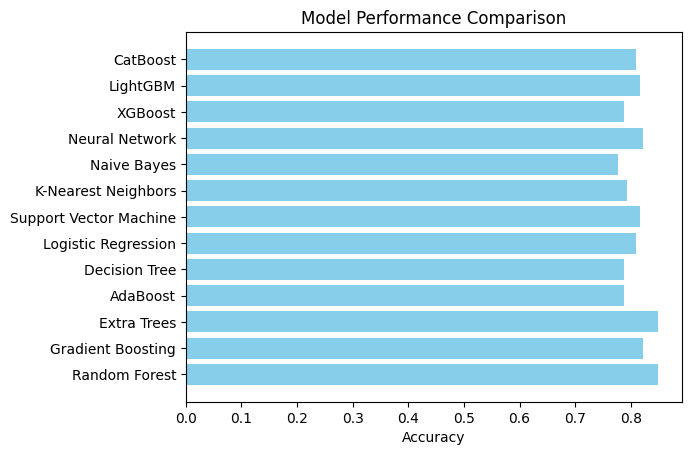

In [2]:
# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Selecting relevant columns and dropping unnecessary ones
titanic_df = titanic_df.drop(columns=["Name", "Ticket", "Cabin"])

# Filling missing values
titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)
titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace=True)

# Preprocessing
X, y = preprocess_data(titanic_df, target_column="Survived", auto=True)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training models
results = train_models(X_train, y_train, X_test, y_test)

# Comparing models
compare_models(results)

# Plot results
plot_results(results)